# crypto-eda

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="crypto-eda")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kartikaye-madhok/crypto-eda


'https://jovian.ai/kartikaye-madhok/crypto-eda'

# What is Cryptocurrency?

note : most of the this notebook is not my original work. it has been copy pasted from the Internet, this was more of a learning experience through doing than creating something original. 

## Downloading a Dataset.
The first thing we need to do is to download the dataset from Kaggle into our Jupyter notebook. In order to do that, we will use a function from opendatasets [Python library](https://github.com/JovianML/opendatasets#opendatasets). This function allows us to download any dataset directly into our jupyter notebook using the url, it saves us the trouble of of downloading the csv file and uploading it manually.

So, lets start by downloading the opendataset library first.

In [9]:
!pip install jovian opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 3.1 MB/s 


In [6]:
dataset_url = 'https://www.kaggle.com/datasets/majyhain/top-100-cryptocurrency-2022' 

In [8]:
import opendatasets as od
od.download(dataset_url)

ModuleNotFoundError: ignored

One major aspect of data science is crosschecking and making sure were on the right track. In order to see if the files are indeed uploaded to the notebook, we shall use the listdir() function, which gives us a list of files within the directory.

In [8]:
data_dir = 'top-100-cryptocurrency-2022'

In [9]:
import os
os.listdir(data_dir)

['Top 100 Cryptocurrency 2022.csv']

PANDAS is another [python library](https://pandas.pydata.org/docs/) which is essential for data analysis, it lets us work with large datasets and make sense of all comma seperated values.



In [10]:
import pandas as pd

In [11]:
crypto_df = pd.read_csv(data_dir + "/Top 100 Cryptocurrency 2022.csv")

In [12]:
crypto_df

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
0,1,BITCOIN,"$36,983",-2.97%,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,"$37,019",-2.84%,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,"$36,942",-4.24%,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC
3,4,ETHEREUM,"$2,510",-3.64%,-1.28%,-32.04%,82.54%,$298.87 B,$10.00 B,119.38 M ETH
4,5,LIDO STAKED ETHER,"$2,494",-3.23%,-1.84%,-31.98%,95.88%,$4.48 B,$2.07 M,1.79 M STETH
...,...,...,...,...,...,...,...,...,...,...
95,96,ECOMI,$0.01,-6.53%,4.42%,9.77%,9999.99%,$3.99 B,$4.01 M,581.91 B OMI
96,97,BITTORRENT,$0.00,$0.00,-1.10%,-19.83%,481.49%,$2.04 B,$283.87 K,932.50 B BTTOLD
97,98,SAFEMOON,$0.00,-3.19%,-3.72%,-34.03%,0.00%,$933.63 M,$410.28 K,566.50 B SFM
98,99,ECASH,$0.00,-3.71%,-1.41%,-32.83%,0.00%,$1.40 B,$19.78 M,18.97 T XEC


Another very important aspect of working online is to periodically save our work in case of the inevertable power loss or internet shortage.

In [13]:
import jovian

In [14]:
jovian.commit(project="crypto-eda")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kartikaye-madhok/crypto-eda


'https://jovian.ai/kartikaye-madhok/crypto-eda'

## Data Preperation and Cleaning

The next step after importing the dataset into our jupyter notebook, is to use Pandas to convert our dataset into a dataframe (tabular data that can be read in python) usinf the pd.read_csv() function.

>**Pandas** is a popular Python library used for working in tabular data. Pandas provides helper functions to read data from various file formats like CSV, HTML, JSON, SQL, et.al


>**CSVs**: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text.

We can check the type of dawnloaded filw using the function type()

In [15]:
type(crypto_df)

pandas.core.frame.DataFrame

If we want to find out the metrics of the dataset(i.e the headings of the tablular data we can do so by the .columns attribute in pandas.

In [16]:
crypto_df.columns

Index(['Ranking', 'Crypto Name', 'Price', 'Changes 24H ', 'Changes 7D ',
       'Changes 30D ', 'Changes 1Y', 'Market Cap', 'Volume 24H',
       'Available Supply'],
      dtype='object')

We can explore the number of rows and columns and we can also explore ranges of values using the methods _df.info() and _df.describe():

In [17]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ranking           100 non-null    int64 
 1   Crypto Name       100 non-null    object
 2   Price             100 non-null    object
 3   Changes 24H       100 non-null    object
 4   Changes 7D        100 non-null    object
 5   Changes 30D       100 non-null    object
 6   Changes 1Y        100 non-null    object
 7   Market Cap        100 non-null    object
 8   Volume 24H        100 non-null    object
 9   Available Supply  99 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.9+ KB


Most rows are the data type object, as they contain values of different types. It appears that one column('Available Supply') has an empty value, as it contains 99 non-null values as opposed to 100 which the rest contain.

One column contained numeric values (Ranking), even though a few others also only posess numeric values, so in order make our analysis more pragmatic, we shall change their data type on a case to case basis.

In [18]:
# Lets start by displaying full length of dataframe:
with pd.option_context('display.max_rows', 900):
    display(crypto_df)

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
0,1,BITCOIN,"$36,983",-2.97%,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,"$37,019",-2.84%,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,"$36,942",-4.24%,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC
3,4,ETHEREUM,"$2,510",-3.64%,-1.28%,-32.04%,82.54%,$298.87 B,$10.00 B,119.38 M ETH
4,5,LIDO STAKED ETHER,"$2,494",-3.23%,-1.84%,-31.98%,95.88%,$4.48 B,$2.07 M,1.79 M STETH
5,6,MAKER,"$1,989.00",1.58%,7.24%,-15.86%,24.94%,$1.78 B,$49.99 M,901.31 K MKR
6,7,BINANCE COIN,$369.80,-3.80%,-3.37%,-27.62%,730.32%,$62.31 B,$1.05 B,168.14 M BNB
7,8,BITCOIN CASH,$280.70,-5.84%,-6.89%,-34.79%,-31.87%,$5.34 B,$1.13 B,18.97 M BCH
8,9,KUSAMA,$156.10,-8.71%,-18.40%,-43.80%,54.92%,$1.40 B,$39.97 M,8.98 M KSM
9,10,MONERO,$142.30,-7.48%,-8.30%,-37.46%,3.07%,$2.59 B,$85.93 M,18.07 M XMR


After a quick look at the dataframe; we see some discrepencies.

* We can see that the column 'Price' contains "$" mixed with the numbers. we will need to replace it with ' ' to keep only the numbers.


* On the column 'Changes 24H ', we are supposed to find data in % but on the dataframe, we can also find cells that have "$". 


* On the column 'Changes 1Y', we are supposed to find data in % but on the dataframe, we can also find cells that have "B".

We will have to handle missing, incorrect and invalid data, altough this might seem tedious python and jupyter have a few tricks that make it close to a one size fit all solution.

In [19]:
crypto_df["Price"]=crypto_df["Price"].replace('[\$\,\.]','',regex=True).astype(int)
crypto_df["Changes 24H "] = crypto_df["Changes 24H "].str.rstrip('%').replace('[\$]', '', regex=True).astype(float) / 100.0
crypto_df["Changes 7D "] = crypto_df["Changes 7D "].str.rstrip('%').astype(float) / 100.0
crypto_df["Changes 30D "] = crypto_df["Changes 30D "].str.rstrip('%').astype(float) / 100.0
crypto_df["Changes 1Y"] = crypto_df["Changes 1Y"].str.rstrip('%').replace('[\$,\ B]', '', regex=True).astype(float) / 100.0
crypto_df["Market Cap"] = crypto_df["Market Cap"].str.strip('$').replace({'B': '*1e9', 'M': '*1e6', '156.78%': '0'}, regex=True).map(pd.eval).astype(float)

In [20]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ranking           100 non-null    int64  
 1   Crypto Name       100 non-null    object 
 2   Price             100 non-null    int64  
 3   Changes 24H       100 non-null    float64
 4   Changes 7D        100 non-null    float64
 5   Changes 30D       100 non-null    float64
 6   Changes 1Y        100 non-null    float64
 7   Market Cap        100 non-null    float64
 8   Volume 24H        100 non-null    object 
 9   Available Supply  99 non-null     object 
dtypes: float64(5), int64(2), object(3)
memory usage: 7.9+ KB


Pandas also allows us to view statistical information for numerical columns (mean, std. deviation, maximum/minimum values, and the number of non-empty values) using .describe() method.

It also allows us to retrieve the number of columns and rows using the .shape() method

In [21]:
crypto_df.describe()

,Ranking,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,5589.860000,-0.045546,-0.022161,0.060432,6.249781,1.633862e+10
std,29.011492,21141.835948,0.052124,0.105809,2.990080,17.225119,7.606276e+10
min,1.000000,0.000000,-0.374000,-0.488000,-0.595700,-0.710900,0.000000e+00
25%,25.750000,88.750000,-0.071225,-0.069250,-0.387900,0.005975,1.362500e+09
50%,50.500000,308.000000,-0.048650,-0.018300,-0.277550,0.402800,2.610000e+09
75%,75.250000,2524.250000,-0.003150,0.011850,-0.132075,3.552400,5.607500e+09
max,100.000000,198900.000000,0.114800,0.302800,29.591700,99.999900,7.014900e+11


In [22]:
crypto_df.shape

(100, 10)

One last thing to do in the cleaning process, is to rename columns in a way that will allow us to use them. Since the title row has spaces, we will need to remove excessive space and replace the space between two words by an underscore '_'.

In [23]:
crypto_df.rename(columns = {'Crypto Name': 'Crypto_Name', 'Changes 24H ' : 'Changes_24H', 'Changes 7D ' : 'Changes_7D', 'Changes 30D ': 'Changes_30D', 'Changes 1Y': 'Changes_1Y', 'Market Cap': 'Market_cap', 'Volume 24H': 'Volume_24H', 'Available Supply': 'Available_Supply'}, inplace = True)
crypto_df

,Ranking,Crypto_Name,Price,Changes_24H,Changes_7D,Changes_30D,Changes_1Y,Market_cap,Volume_24H,Available_Supply
0,1,BITCOIN,36983,-0.0297,0.0196,-0.2008,0.0825,7.014900e+11,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,37019,-0.0284,0.0184,-0.2013,0.0826,1.004000e+10,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,36942,-0.0424,0.0137,-0.2039,0.0782,1.470000e+09,$29.51 M,39.88 K HBTC
3,4,ETHEREUM,2510,-0.0364,-0.0128,-0.3204,0.8254,2.988700e+11,$10.00 B,119.38 M ETH
4,5,LIDO STAKED ETHER,2494,-0.0323,-0.0184,-0.3198,0.9588,4.480000e+09,$2.07 M,1.79 M STETH
...,...,...,...,...,...,...,...,...,...,...
95,96,ECOMI,1,-0.0653,0.0442,0.0977,99.9999,3.990000e+09,$4.01 M,581.91 B OMI
96,97,BITTORRENT,0,0.0000,-0.0110,-0.1983,4.8149,2.040000e+09,$283.87 K,932.50 B BTTOLD
97,98,SAFEMOON,0,-0.0319,-0.0372,-0.3403,0.0000,9.336300e+08,$410.28 K,566.50 B SFM
98,99,ECASH,0,-0.0371,-0.0141,-0.3283,0.0000,1.400000e+09,$19.78 M,18.97 T XEC


We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [24]:
#taking 10 sample rows at random

crypto_df.sample(10)

,Ranking,Crypto_Name,Price,Changes_24H,Changes_7D,Changes_30D,Changes_1Y,Market_cap,Volume_24H,Available_Supply
59,60,POLYGON,154,-0.0784,-0.0419,-0.3894,37.8796,1.061000e+10,$808.97 M,6.87 B MATIC
56,57,FANTOM,193,-0.1046,-0.1435,-0.1423,13.6924,4.920000e+09,$691.50 M,2.54 B FTM
44,45,KADENA,558,-0.1321,-0.0304,-0.5502,29.5640,9.369700e+08,$29.46 M,167.82 M KDA
21,22,TERRA,4413,-0.3740,-0.4880,29.5917,0.1759,1.759000e+10,$1.59 B,400.68 M LUNA
71,72,TETHER,100,-0.0033,0.0018,0.0032,0.0053,7.826000e+10,$32.57 B,78.12 B USDT
38,39,HUOBI TOKEN,902,0.0173,-0.0230,-0.0377,0.4122,1.410000e+09,$31.94 M,156.74 M HT
82,83,STELLAR,19,-0.0619,-0.0382,-0.2789,-0.4039,4.790000e+09,$174.57 M,24.84 B XLM
70,71,USD COIN,100,0.0001,-0.0024,0.0022,0.0062,4.996000e+10,$2.10 B,49.79 B USDC
8,9,KUSAMA,15610,-0.0871,-0.1840,-0.4380,0.5492,1.400000e+09,$39.97 M,8.98 M KSM
36,37,NEAR,1020,-0.0702,-0.1329,-0.3039,3.6907,6.400000e+09,$280.93 M,628.84 M NEAR


Now that the data has been cleaned reasonably, we shall use libraries like Matplotlib and Seaborn in pandas for visualizations.


But before we do that, we must save our work.

In [ ]:
import jovian

In [ ]:
jovian.commit(project="crypto-eda")

## Exploratory Analysis and Visualizations

Before we start asking questions about the components of the retrieved dataframe, it would help to compute some statistics for numeric columns, understand distributions of numeric columns using visualization techniques, explore relationship between columns using scatter plots, bar charts etc.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now, lets look at the CC and plot the ones with the highest prices. We shall use the `sort_values` function in pandas for this.

In [26]:
top_prices = crypto_df.sort_values('Price', ascending= False).head(20)
top_prices

,Ranking,Crypto_Name,Price,Changes_24H,Changes_7D,Changes_30D,Changes_1Y,Market_cap,Volume_24H,Available_Supply
5,6,MAKER,198900,0.0158,0.0724,-0.1586,0.2494,1.780000e+09,$49.99 M,901.31 K MKR
1,2,WRAPPED BITCOIN,37019,-0.0284,0.0184,-0.2013,0.0826,1.004000e+10,$253.14 M,271.16 K WBTC
0,1,BITCOIN,36983,-0.0297,0.0196,-0.2008,0.0825,7.014900e+11,$13.01 B,18.94 M BTC
6,7,BINANCE COIN,36980,-0.0380,-0.0337,-0.2762,7.3032,6.231000e+10,$1.05 B,168.14 M BNB
2,3,HUOBI BTC,36942,-0.0424,0.0137,-0.2039,0.0782,1.470000e+09,$29.51 M,39.88 K HBTC
7,8,BITCOIN CASH,28070,-0.0584,-0.0689,-0.3479,-0.3187,5.340000e+09,$1.13 B,18.97 M BCH
8,9,KUSAMA,15610,-0.0871,-0.1840,-0.4380,0.5492,1.400000e+09,$39.97 M,8.98 M KSM
9,10,MONERO,14230,-0.0748,-0.0830,-0.3746,0.0307,2.590000e+09,$85.93 M,18.07 M XMR
10,11,AAVE,14210,-0.0708,-0.0967,-0.4401,-0.5425,1.930000e+09,$92.85 M,13.49 M AAVE
11,12,ELROND,13568,-0.0885,0.0132,-0.4315,1.1034,2.780000e+09,$96.17 M,20.47 M EGLD


We will now proceed to visualize it using a `Bar Chart`

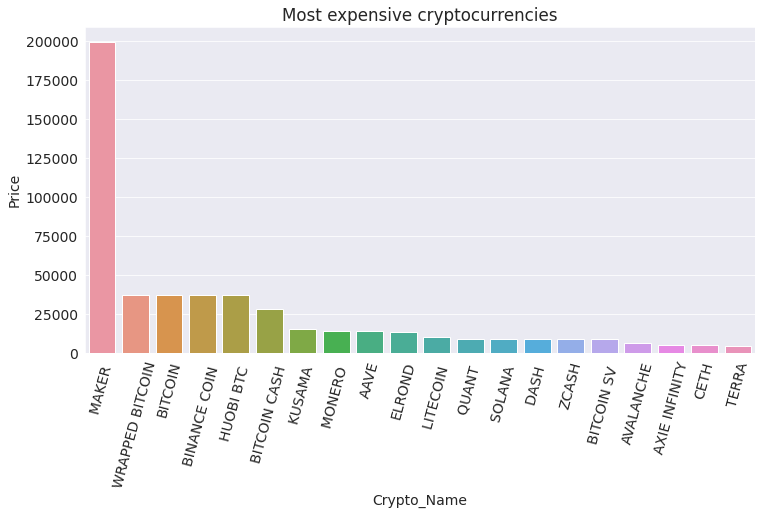

In [27]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Most expensive cryptocurrencies')
sns.barplot(x='Crypto_Name', y='Price', data=top_prices);

It appears that 'MAKER' is the priciest cryptocurrency in 2022 with a price that reached 198,900 USD by the 1st of January. But why did the price of MAKER explode in 2022?

Maker (MKR), the governance token of the MakerDAO and the Maker Protocol, has shot up 64.76% to emerge as the third best-performing cryptocurrency on weekly basis on CoinMarketCap’s list.

**What Happened:** MKR traded 32.03% higher at USD 3,660.78 at press time. The cryptocurrency trailed XRP (XRP) and Dogecoin (DOGE) which have rallied 67.31\% and 353.77\% respectively in a seven-day trailing period.

At press time, XRP traded 3.48\% lower at  USD 1.72. DOGE traded 112.46\% higher at USD 0.27.

Earlier in the month, Maker announced a drive to make its community completely decentralized and announced key components to achieve that goal.

The three key components revolve around elected paid contributors and domain teams, maker improvement proposals, and vote delegates, according to Maker’s statement.

**Why It Matters:** It is noteworthy that Maker Protocol and MakerDAO manage the development of Ethereum-based stable coin DAI (DAI). 

There is increasing demand for DAI due to its use in multiple Decentralized Finance protocols like AAVE (AAVE), Compound (COMP) and Cream Finance (CREAM), Cointelegraph reported.

DAI is created by locking collateral like ETH and ChainLink (LINK) into a MakerDAO vault and generating DAI against the locked coins.

This has, in turn, resulted in an increase in the total value locked of the Maker protocol which has a TVL of USD 9.31 billion at press time, according to DeFi pulse. Compound had the most TVL of USD 11.28 billion.

*Source: https://dangthanhvinh.com/why-is-maker-cryptocurrency-skyrocketing-benzinga-1645382657*

Now, lets look at the least expensive cryptocurrencies. We shall use the `sort_values` function in pandas for this.

In [28]:
lowest_prices = crypto_df.sort_values('Price', ascending = False).tail(20)
lowest_prices

,Ranking,Crypto_Name,Price,Changes_24H,Changes_7D,Changes_30D,Changes_1Y,Market_cap,Volume_24H,Available_Supply
80,81,OASIS NETWORK,30,-0.0712,-0.1487,-0.3050,4.3624,1.050000e+09,$95.83 M,3.49 B ROSE
81,82,HEDERA,21,-0.0685,-0.0443,-0.2720,1.6153,4.000000e+09,$44.51 M,18.87 B HBAR
82,83,STELLAR,19,-0.0619,-0.0382,-0.2789,-0.4039,4.790000e+09,$174.57 M,24.84 B XLM
83,84,GALA,18,-0.0979,-0.0682,-0.5957,60.1742,1.390000e+09,$456.98 M,7.54 B GALA
84,85,HARMONY,18,-0.0834,-0.1446,-0.2484,18.3846,2.060000e+09,$93.40 M,11.69 B ONE
85,86,CHILIZ,17,-0.0713,-0.0528,-0.0528,7.3647,9.379200e+08,$102.38 M,5.34 B CHZ
86,87,THETA FUEL,17,-0.0006,0.2255,-0.1014,5.0673,1.890000e+09,$24.46 M,NaN
87,88,RADIX,17,-0.0200,-0.0650,-0.3251,0.0000,1.620000e+09,$222.03 K,9.76 B XRD
88,89,DOGECOIN,14,-0.0441,-0.0294,-0.1937,3.8219,1.825000e+10,$429.44 M,132.67 B DOGE
89,90,NEM,10,-0.0519,0.0107,-0.1981,-0.5717,8.893000e+08,$18.66 M,9.00 B XEM


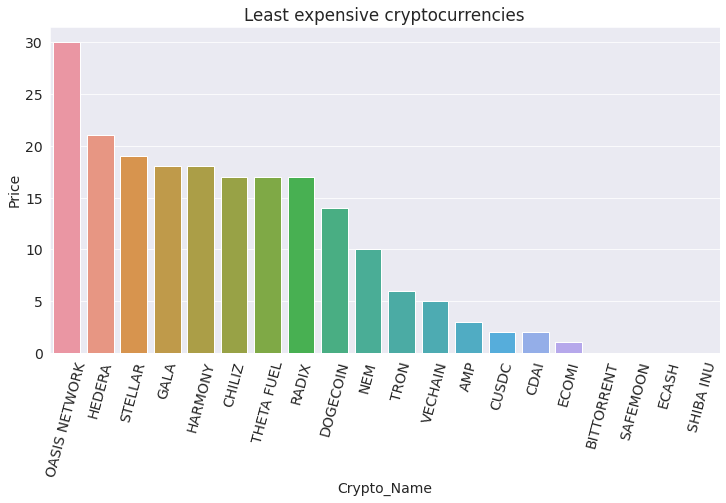

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Least expensive cryptocurrencies')
sns.barplot(x= 'Crypto_Name', y= 'Price', data= lowest_prices);

It appears that SHIBA INU is the least expensive cryptocurrency. But why?

Well, Shiba Inu is cheap because it is relatively new- barely 17 months old. It is also cheap because of its massive supply of 1 Quadrillion SHIB tokens and particularly low demand. It is cheap because it has no real value save for the hype it is currently receiving in the media and also because there is not enough data - fundamental or technical - to help serious investors map out a possible price action for the coin.

Its price also greatly increased during the peak second wave of Covid-19, as almost a billion tokens were `burnt`, by ETH co-founder `Vitalik Butterin` and a simillar amount was donated to COVID relief in INDIA.

But we need to understand that low prices do not always mean that a cryptocurrency is lowly valued. Take Shiba Inu as an example. For the past week, its prices have been ranging between USD 0.000020 and USD 0.000022. But it still has a colossal market capitalization of USD 11 Billion.

Today, it is ranked in the top 20 of the largest cryptocurrencies by market cap, which is way ahead of some highly-priced coins like Maker and Compound, which have lower market caps.

**With everything that has been said above, the question is, is it a good idea to invest in SHIBA INU?**

```Crypto experts are confident that Shiba Inu prices will rise again and continue uptrending as long as the media buzz around the coin lives on. But since the token’s only claim to value is its media hype, you are cautioned against treating it as a long-term investment.```

```Where possible, consider investing in Shiba Inu CFDs that let you go long or short on the token, ensuring that you make money from both its gains and losses.```

Now that we have explored the price changes columns, let's explore the Market Cap column, and see how it can help us with making an investment decision.

### What is market cap (Market Capitalization)?

Market Capitalization is an indicator that measures and keeps track of the market value of a cryptocurrenct. Its used as an indicator of the dominance andd popularity of the asset. Though this metric is widely used, using other metrics before making trading decissions is highly recomended.

Even though the market cap of a project is still seen as the most important indicator of relevancy, the concept behind this is often subject to criticism. The reason is that the market cap of a cryptocurrency more or less reflects the popularity of a coin over a longer term.

Large-cap cryptocurrencies are generally considered to be safe crypto investments. These are companies with a market cap of more than $10 billion. Investing in coins with large market capitalisation is usually a conservative strategy. These coins are likely to be less volatile than other cryptocurrencies but still more volatile than traditional assets like stocks.

Mid-cap cryptos are more volatile but also have a lot more growth potential than large-cap cryptocurrencies.

Small-cap cryptocurrencies are often extremely volatile and considered a highly risky investment, albeit sometimes with a lot of potential (short-term) growth. However, be aware that they may also crash, literally from one minute to the next.

As always with cryptocurrencies, we recommend to do thorough research before investing and consider all vital factors involved. For instance, market cap as a metric doesn’t say much about actual trading volumes over the last couple of hours. Therefore it makes sense to also check Coinmarketcap for the 24-hour trading volume that a cryptocurrency has on different exchanges over a reasonable period and other essential criteria before investing.

#### Market Capitalization (Cryptoasset)
Market capitalization of the cryptoasset is calculated by multiplying the existing reference price of the cryptoasset by the current circulating supply. Let’s take the market capitalization of Bitcoin as an example:

Let (C) be the last known reference price of Bitcoin from CoinMarketCap in USD.
Let (S) be the current circulating supply of Bitcoin.
Let (D) be the derived market capitalization for Bitcoin.

For this example, let (C) = 10,000 USD / 1 BTC and let (S) = 17,000,000 BTC.

D = C * S
D = 10,000 USD / 1 BTC * 17,000,000 BTC = 170,000,000,000 USD

Therefore, the derived market capitalization for Bitcoin is $170,000,000,000 USD.

#### Market Capitalization (Aggregate)

The total market capitalization for all cryptoassets (found on the top of the site as “Market Cap”) is the sum of all individual cryptoasset market capitalizations that meet a set of requirements

Now, lets have a look at the cryptocurrencies that have the largest market cap. We shall use the `sort_values` function for the same.

In [30]:
top_cap = crypto_df.sort_values('Market_cap', ascending= False).head(20)
top_cap

,Ranking,Crypto_Name,Price,Changes_24H,Changes_7D,Changes_30D,Changes_1Y,Market_cap,Volume_24H,Available_Supply
0,1,BITCOIN,36983,-0.0297,0.0196,-0.2008,0.0825,7.014900e+11,$13.01 B,18.94 M BTC
3,4,ETHEREUM,2510,-0.0364,-0.0128,-0.3204,0.8254,2.988700e+11,$10.00 B,119.38 M ETH
71,72,TETHER,100,-0.0033,0.0018,0.0032,0.0053,7.826000e+10,$32.57 B,78.12 B USDT
6,7,BINANCE COIN,36980,-0.0380,-0.0337,-0.2762,7.3032,6.231000e+10,$1.05 B,168.14 M BNB
70,71,USD COIN,100,0.0001,-0.0024,0.0022,0.0062,4.996000e+10,$2.10 B,49.79 B USDC
63,64,CARDANO,102,-0.0486,-0.0944,-0.2254,1.8165,3.259000e+10,$693.93 M,32.07 B ADA
13,14,SOLANA,9003,-0.0635,-0.0963,-0.4706,20.2816,2.843000e+10,$975.64,315.10 M SOL
77,78,XRP,59,-0.0563,-0.0703,-0.2961,0.3582,2.795000e+10,$2.27 B,47.74 B XRP
32,33,POLKADOT,1736,-0.0844,-0.0785,-0.3520,0.0541,1.871000e+10,$695.44 M,1.08 B DOT
88,89,DOGECOIN,14,-0.0441,-0.0294,-0.1937,3.8219,1.825000e+10,$429.44 M,132.67 B DOGE


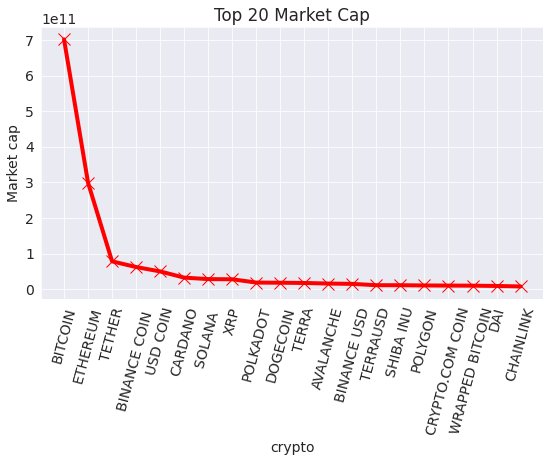

In [31]:
plt.plot(top_cap.Crypto_Name ,top_cap.Market_cap, 'r-x', linewidth=4, markersize=12,);
plt.title('Top 20 Market Cap')
plt.xlabel('crypto');
plt.ylabel('Market cap');
plt.xticks(rotation=75);

**It appears that BITCOIN can be considered as a Large-cap cryptocurrencies, and thus, is generally considered to be safe a crypto investments.**

**What Does Crypto Market Cap Mean for Investors?**

In the stock market, knowing a company’s market capitalization classifies it into an investment category: small cap, mid-cap, or large-cap. An investor might choose to divide their investment into these groups for different reasons, so knowing market cap is important. Market cap is often used to refer to how much a company is worth, and this value can be reflected in how risky it is to invest in the company. Large-cap stocks are often less risky, but slower-growing than mid- or small-cap stocks. 

However, cryptocurrency is new. So new, in fact, that these types of categories haven’t yet been formed. And since experts say you should stick to Bitcoin and Ethereum, and not let crypto represent more than 5% of your total portfolio, there is less need to use market cap in determining investment decisions. 

Knowing cryptocurrency market cap might be interesting if you wish to know the scope or potential of a certain token, but it shouldn’t be as big a factor with your investing decisions as it might be in the stock market. With crypto, It’s very important to recognize that it’s completely different from the stock market. It’s a completely different world.

While market capitalization has a more limited application with crypto investing, there is one way it can potentially help guide the way you invest in Bitcoin and Ethereum.

**How to Use a Crypto Weighted Market Cap Strategy?**

A weighted market cap strategy means you put a proportional investment into each asset based on market cap. So if you take the total market capitalizations of both Bitcoin and Ethereum, then divide out the percentages each individual crypto holds in that total, you’d end up with about 71% Bitcoin and 29% Ethereum. 

This approach can help you determine how to invest USD 100 in the two biggest cryptocurrencies: You’d invest about USD 71 in Bitcoin and USD 29 in Ethereum.

While the experts say you shouldn’t bother with other altcoins (anything that’s not Bitcoin), the same philosophy can in theory be used for whatever you wish to include into your portfolio. Just allocate how much of a total investment amount you wish to put into each coin based on its proportional market capitalization. At the very least, this ensures you are putting much smaller amounts in other cryptos, and larger amounts in the relatively safer Bitcoin and Ethereum.

It’s also important to remember that because crypto prices fluctuate so dramatically, market capitalization is constantly changing. This fluctuation — along with the potential for the market to drop out entirely — is also why experts recommend keeping any investment extremely limited, and only to invest what you’re OK with losing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions (Part 1/2)

In this section, we will ask intersting questions related to our dataframe:

## Q1: What are the top 20 Cryptocurrencies that have the highest price changes?

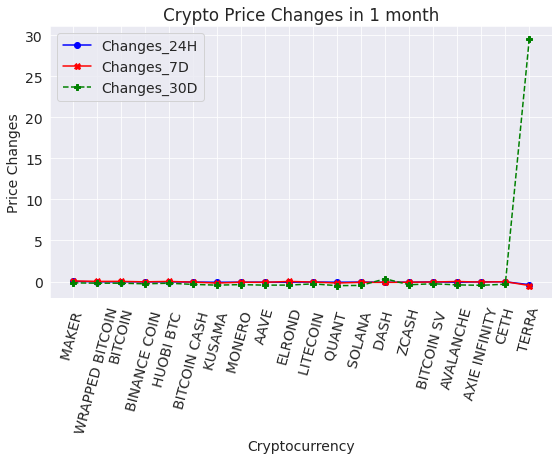

In [32]:
plt.plot(top_prices.Crypto_Name, top_prices.Changes_24H, 'o-b')
plt.plot(top_prices.Crypto_Name, top_prices.Changes_7D, 'X-r')
plt.plot(top_prices.Crypto_Name, top_prices.Changes_30D, 'P--g')

plt.xlabel('Cryptocurrency')
plt.ylabel('Price Changes')
plt.title('Crypto Price Changes in 1 month')
plt.legend(["Changes_24H", "Changes_7D", "Changes_30D"])
plt.xticks(rotation=75);

It looks like TERRA is the most expensive crypto that has the highest price changes on the very short term, with -37.40% in 24 hours, -0.4880% in 7 days, and 29.5917% in one month. How can we explain that?


There are multiple factors that can be well attributed to the rise as Terra is considered to be a serious competition for Ethereum. Here are some major factors:


* The crypto market is witnessing a sudden surge in the demand for stablecoins which is driving the upward trend in Terra prices.


* Moreover, Terra ecosystem has gained a lot of investor attention after the recent launch of Terra based ETFs. It is expected to continue to be an important part of the global payment system due to its fiat-backed protocol.


* Luna Foundation Guard has raised USD 1 billion recently to create a Bitcoin-led reserve for UST stable coin which may have sparked the investor's interest in the Terra ecosystem

* Terra's burn mechanism is another factor which is adding to the rally. The point of burning LUNA tokens from the community pool was to create scarcity of the asset and boost its price.

* Terra is known to be one of the fastest-growing cryptos in the market. Terra aims to combine the price stability and wide adoption of fiat currencies with the censorship-resistance of Bitcoin and offers fast and affordable settlements.


* Another reason for the bullish price moves in LUNA has been the network's growing ecosystem of decentralized finance (DeFi) protocols that have helped push the total value locked on the protocol to a new all-time high.


Now let's look at expensive crypto changes over a year: 

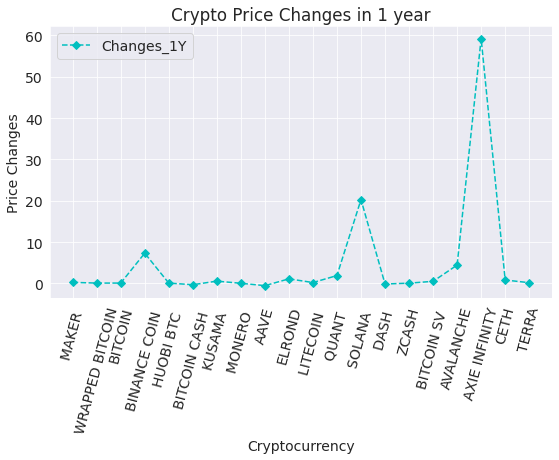

In [33]:
plt.plot(top_prices.Crypto_Name, top_prices.Changes_1Y, 'D--c')

plt.xlabel('Cryptocurrency')
plt.ylabel('Price Changes')
plt.title('Crypto Price Changes in 1 year')
plt.legend(["Changes_1Y"])
plt.xticks(rotation=75);

It appears that AXIE INFINITY reaches the peak of price changes with 5924.29% along with SOLANA (2028.16%), and BINANCE COIN (730.32%). But why?

> Axie Infinity is the video game broadly recognized as the current king of the NFT gaming hill. 


* The reasons for AXIE INFINITY's peak, include a large and growing community that strongly supports the project, as well as the still early phase of the NFT gaming market with ample space for multiple growing projects. The first-mover advantage Axie Infinity enjoys on the NFT gaming scene is broadly seen as a market position that will be difficult to challenge by other projects, both in the near future and further along. As Bitcoin is the father of crypto, Axie Infinity is the mother of NFT games.



> Solana is a cryptocurrency built for low-cost, high-speed transactions, making it more of a utility coin.


* Solana (SOL) was launched in 2020 and has already made its way into the top 20 cryptos. It is ranked 13th and is up almost 2028.16% in the last year. Its proof of history makes it one of the most scalable and sustainable major blockchains. It is capable of more TPS (transactions per second) than Visa. Solana also has huge applications in the rapidly expanding growth markets of NFTs.


> Binance is the world’s largest crypto exchange, and Binance Coin (BNB) was created as an easy way to pay fees on the exchange. It has since been updated to be the native coin of the Binance network, also known as Binance Smart Chain.
>BNB is the native cryptocurrency of the Binance exchange. The Binance coin was originally created as an ERC-20 token on the Ethereum network but has since moved away from this and developed its own network, the Binance Smart Chain. The Binance Smart Chain is a smart contract-enabled blockchain network created with the goal of creating a decentralised financial (DeFi) ecosystem.

* The Binance coin price gained more than 44% in the first two weeks of September 2020 with the launch of BSC, reaching USD 33.49, its highest level since July 2019. The price took off in February 2021, as cryptocurrency markets began to rally. BNB reached a high of USD 342.88 on 19 February, pulled back to USD 190.41 on 23 February, then resumed an upward trend to reach its all-time high of USD 689.33 on 10 May. The price dropped to USD 213.52 on 23 May as the cryptocurrency markets sold off. The markets staged a rally over the summer and dipped again in September before the most recent rally in early November, which has brought the BNB price back up towards the USD 600 level.

## Q2: What are the lowest 20 Cryptocurrencies that have the lowest price changes?

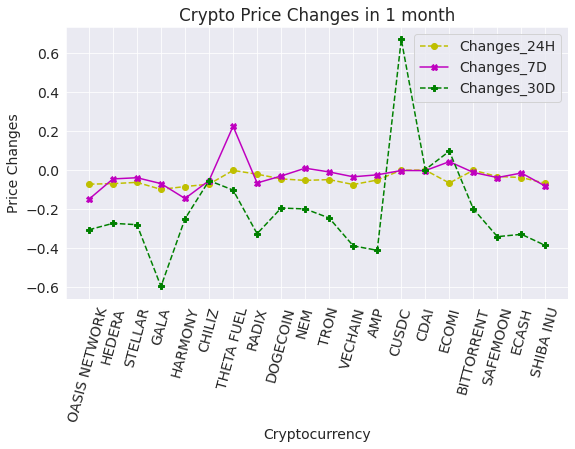

In [34]:
plt.plot(lowest_prices.Crypto_Name, lowest_prices.Changes_24H, 'o--y')
plt.plot(lowest_prices.Crypto_Name, lowest_prices.Changes_7D, 'X-m')
plt.plot(lowest_prices.Crypto_Name, lowest_prices.Changes_30D, 'P--g')

plt.xlabel('Cryptocurrency')
plt.ylabel('Price Changes')
plt.title('Crypto Price Changes in 1 month')
plt.legend(["Changes_24H", "Changes_7D", "Changes_30D"])
plt.xticks(rotation=75);

It appears that the only low cost crypto that has a positive price change in 1 month is CUSDC with 0.6710% 

Let's see now the changes of prices in one year:

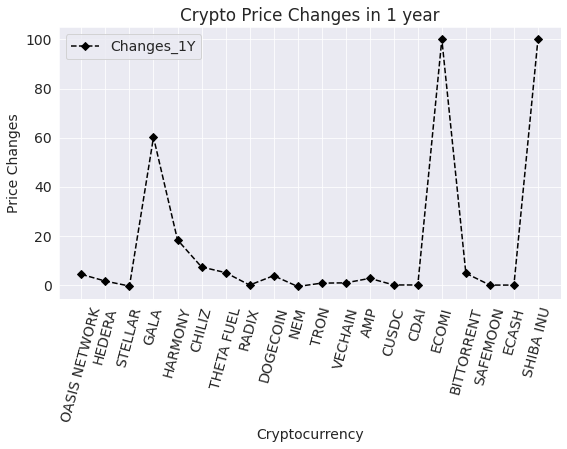

In [35]:
plt.plot(lowest_prices.Crypto_Name, lowest_prices.Changes_1Y, 'D--k')

plt.xlabel('Cryptocurrency')
plt.ylabel('Price Changes')
plt.title('Crypto Price Changes in 1 year')
plt.legend(["Changes_1Y"])
plt.xticks(rotation=75);

It appears that SHIBA INU and ECOMI have really a great potential and are competitors, since the changes over one year show that they bothe reached a peak of 9,999.99 USD.

We can also see that the cryptocurrency GALA has reached 6017.42 USD in one year.

Now, let's move to answering a more general question, that will provide us with the main goal behind this project, which is to predict what crypto is the best one to invest in in 2022: 

First, let's find a tool that can help us predict the future of crypto. 

There are a lot of ways to predict crypto, some of the ways are focused 100% on the price changes, other ways are based on opinion mining through social media (like sentiment analysis). 

In this project, we will focus on the sentiment analysis method that will be performed on tweets.


Before we answer this question, here are 5 things to Consider Before Investing in Cryptocurrency:

1. Never invest more than you can afford to lose
2. Conduct your own research
3. Use common sense: If it sounds too good to be true it usually is
4. Never act based on FOMO (fear of missing out.)
5. Safeguard your keys : Never store it on your computer and don’t leave it out in the open. Attempt to memorize it, and write your phrase down and keep it locked up.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Sentiment Analysis

### Sentiment Analysis

#### What is sentiment analysis?

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.


#### Why Is Sentiment Analysis Important?

Since humans express their thoughts and feelings more openly than ever before, sentiment analysis is fast becoming an essential tool to monitor and understand sentiment in all types of data.

Automatically analyzing customer feedback, such as opinions in survey responses and social media conversations, allows brands to learn what makes customers happy or frustrated, so that they can tailor products and services to meet their customers’ needs. Or in our case, predict the prices and the progression of crypto in the next months.


#### The overall benefits of sentiment analysis include:

##### Sorting Data at Scale

Can you imagine manually sorting through thousands of tweets, customer support conversations, or surveys? There’s just too much business data to process manually. Sentiment analysis helps businesses process huge amounts of unstructured data in an efficient and cost-effective way.

##### Real-Time Analysis

Sentiment analysis can identify critical issues in real-time, for example is a PR crisis on social media escalating? Sentiment analysis models can help you immediately identify these kinds of situations, so you can take action right away.

##### Consistent criteria

It’s estimated that people only agree around 60-65% of the time when determining the sentiment of a particular text. Tagging text by sentiment is highly subjective, influenced by personal experiences, thoughts, and beliefs.

By using a centralized sentiment analysis system, companies can apply the same criteria to all of their data, helping them improve accuracy and gain better insights.


#### Sentiment Analysis Challenges

Sentiment analysis is one of the hardest tasks in natural language processing because even humans struggle to analyze sentiments accurately.

Data scientists are getting better at creating more accurate sentiment classifiers, but there’s still a long way to go. Let’s take a closer look at some of the main challenges of machine-based sentiment analysis:

##### Subjectivity and Tone

There are two types of text: subjective and objective. Objective texts do not contain explicit sentiments, whereas subjective texts do. Say, for example, you intend to analyze the sentiment of the following two texts:

The package is nice.

The package is red.

Most people would say that sentiment is positive for the first one and neutral for the second one, right? All predicates (adjectives, verbs, and some nouns) should not be treated the same with respect to how they create sentiment. In the examples above, nice is more subjective than red.

##### Context and Polarity

All utterances are uttered at some point in time, in some place, by and to some people, you get the point. All utterances are uttered in context. Analyzing sentiment without context gets pretty difficult. However, machines cannot learn about contexts if they are not mentioned explicitly. One of the problems that arise from context is changes in polarity. Look at the following responses to a survey:

Everything about it.

Absolutely nothing!

Imagine the responses above come from answers to the question What did you like about the event? The first response would be positive and the second one would be negative, right? Now, imagine the responses come from answers to the question What did you DISlike about the event? The negative in the question will make sentiment analysis change altogether.

A good deal of preprocessing or postprocessing will be needed if we are to take into account at least part of the context in which texts were produced. However, how to preprocess or postprocess data in order to capture the bits of context that will help analyze sentiment is not straightforward.

##### Irony and Sarcasm

When it comes to irony and sarcasm, people express their negative sentiments using positive words, which can be difficult for machines to detect without having a thorough understanding of the context of the situation in which a feeling was expressed.

For example, look at some possible answers to the question, Did you enjoy your shopping experience with us?

Yeah, sure. So smooth!

Not one, but many!

What sentiment would you assign to the responses above? The first response with an exclamation mark could be negative, right? The problem is there is no textual cue that will help a machine learn, or at least question that sentiment since yeah and sure often belong to positive or neutral texts.

How about the second response? In this context, sentiment is positive, but we’re sure you can come up with many different contexts in which the same response can express negative sentiment.

##### Defining Neutral
Defining what we mean by neutral is another challenge to tackle in order to perform accurate sentiment analysis. As in all classification problems, defining your categories -and, in this case, the neutral tag- is one of the most important parts of the problem. What you mean by neutral, positive, or negative does matter when you train sentiment analysis models. Since tagging data requires that tagging criteria be consistent, a good definition of the problem is a must.

Here are some ideas to help you identify and define neutral texts:

Objective texts. So called objective texts do not contain explicit sentiments, so you should include those texts into the neutral category.
Irrelevant information. If you haven’t preprocessed your data to filter out irrelevant information, you can tag it neutral. However, be careful! Only do this if you know how this could affect overall performance. Sometimes, you will be adding noise to your classifier and performance could get worse.
Texts containing wishes. Some wishes like, I wish the product had more integrations are generally neutral. However, those including comparisons like, I wish the product were better are pretty difficult to categorize
##### Human Annotator Accuracy
Sentiment analysis is a tremendously difficult task even for humans. On average, inter-annotator agreement (a measure of how well two (or more) human labelers can make the same annotation decision) is pretty low when it comes to sentiment analysis. And since machines learn from labeled data, sentiment analysis classifiers might not be as precise as other types of classifiers.

Still, sentiment analysis is worth the effort, even if your sentiment analysis predictions are wrong from time to time. By using MonkeyLearn’s sentiment analysis model, you can expect correct predictions about 70-80% of the time you submit your texts for classification.

If you are new to sentiment analysis, then you’ll quickly notice improvements. For typical use cases, such as ticket routing, brand monitoring, and VoC analysis, you’ll save a lot of time and money on tedious manual tasks.

#### Collecting Data 
In this part of the project, we will retrieve tweets and we will analyze the overall sentiment of Twitter users about Bitcoin to see if that can help us make a decision.

#### Scope

Sentiments are only collected from one micro-blogging source; Twitter. Due to Twitters establishment in the micro-blogging sphere, as well as its accessible programmatic interface for data collection.

Similarly, the decision to limit the cryptocurrency to Bitcoin came down to Bitcoin being the most established cryptocurrency both in age and cryptocurrency market share, reflecting its acceptance in the public’s eye.

The initial goal was to collect data from Twitter in order to use it for our sentiment analysis. The tweets should have been collected using Twitter API (a portal for developers), then used in combination with Tweepy (a Twitter library in Python that allows to filter and clean retrieved tweets). But, at the current time this project is being worked on, my developer profile is still under review. This is why instead of going step by step to retrieve tweets, I retrieved the dataset directly from Kaggle.com as a csv. The data in this file has already been cleaned and processed and is ready to be used in the sentiment analysis. 

The step by step tweets mining and real-time gathering will be subject to another project in the future.

#### Source of our Datasets

The tweets have #Bitcoin and #btc hashtag.. Collection star started on 6/2/2021, with an initial 100,000 tweets, and will continue on a daily basis.

Please check [Data Gathering](https://www.kaggle.com/code/kaushiksuresh147/twitter-data-extraction-for-ipl2020/notebook) to get a better look at how the data was gathered from Twitter API and cleaned by using Tweepy.

Please check [source of data](https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets) to get a better idea about the context and content of the dataset.

You can check the Kaggle profile of the author [here](https://www.kaggle.com/kaushiksuresh147)

You can also check the author linkedin profile [here](https://www.linkedin.com/in/kaushik-suresh/)

Now, let's download the data, and list the files within the dataset.

In [4]:
dataset_url3 = 'https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets?select=Bitcoin_tweets.csv' 

In [10]:
import opendatasets as od
od.download(dataset_url3)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kartikayemadhok
Your Kaggle Key: ··········


100%|██████████| 510M/510M [00:04<00:00, 129MB/s]


Let's check if the files are indeed uploaded to the notebook. And for that, we will use the function listdir() to give us the list of files within the directory made for the cvs files:

In [11]:
data_dir2 = 'bitcoin-tweets'

In [12]:
import os
os.listdir(data_dir2)

['Bitcoin_tweets.csv']

The csv file we downloaded is a very large one. So, in order to be able to display it, we will need to read the csv file in chunks.


The chunksize parameter specifies the number of rows per chunk. (The last chunk may contain fewer than chunksize rows, of course.)

Let's try to use the chunks method:

In [13]:
!pip install -U textblob --quiet

In [14]:
import pandas as pd
import re
from textblob import TextBlob

In [ ]:
# chunksize = 10 ** 4
# with pd.read_csv(data_dir2 + "/Bitcoin_tweets.csv", chunksize=chunksize) as reader:
#     for chunk in reader:
#         display(chunk)

In [54]:
chunk.shape

(3526657, 13)

In [15]:

chunk = pd.read_csv(data_dir2 + "/Bitcoin_tweets.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
# remove nan value row in hastags column
chunk.dropna(subset = ["hashtags"], inplace=True)
chunk.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False


In [57]:
n = 100  # every 100th line = 1% of the lines
df2 = pd.read_csv(data_dir2+'/Bitcoin_tweets.csv', skiprows=lambda i: i % n != 0)

In [51]:
df.shape

(35438, 13)

In [58]:
# get only texts
df = df2[['text']]
df.columns = ['tweets']

In [59]:
# create a function to clean the tweets
def cleanTwt(twt):
    twt = re.sub("#bitcoin", 'bitcoin', twt) # removes the '#' from bitcoin
    twt = re.sub("#Bitcoin", 'Bitcoin', twt) # removes the '#' from Bitcoin
    twt = re.sub('#[A-Za-z0-9]+', '', twt) # removes any string with a '#'
    twt = re.sub('\\n', '', twt) # removes the '\n' string
    twt = re.sub('https:\/\/\S+', '', twt) # removes any hyperlinks
    return twt

In [60]:
df['cleaned_tweets'] = df['tweets'].apply(cleanTwt)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweets,cleaned_tweets
0,$FTM is looking super amazing. Should easily d...,$FTM is looking super amazing. Should easily d...
1,$TRB from 37$ to 55%. Sweet little profits in ...,$TRB from 37$ to 55%. Sweet little profits in ...
2,INSTALL #PRESEARCH BROWSER EXTENSION !!\n\n#ea...,INSTALL BROWSER EXTENSION !! easy while brow...
3,"⏰ 00:00\n₿ Bitcoin = 44.709,1105 $\n#bitcoin #...","⏰ 00:00₿ Bitcoin = 44.709,1105 $bitcoin"
4,History in the making #bitcoin \n#btc $BTC htt...,History in the making bitcoin $BTC
...,...,...
35433,$BTC | #BTC \n\nUpdate. https://t.co/t4DdLkwt78,$BTC | Update.
35434,GM! So happy to be a part of the Donkey Link c...,GM! So happy to be a part of the Donkey Link c...
35435,uniquenftbuyer1 #GemCave has♟️Game changing on...,uniquenftbuyer1 has♟️Game changing on-chain N...
35436,The #skulliescollection will be dropping soon!...,The will be dropping soon! Make sure to follo...


In [61]:
# create a function to get subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

# create two new columns called "Subjectivity" & "Polarity"
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [62]:
df.head(5)

,tweets,cleaned_tweets,subjectivity,polarity
0,$FTM is looking super amazing. Should easily d...,$FTM is looking super amazing. Should easily d...,0.800000,0.455556
1,$TRB from 37$ to 55%. Sweet little profits in ...,$TRB from 37$ to 55%. Sweet little profits in ...,0.575000,0.081250
2,INSTALL #PRESEARCH BROWSER EXTENSION !!\n\n#ea...,INSTALL BROWSER EXTENSION !! easy while brow...,0.833333,0.677083
3,"⏰ 00:00\n₿ Bitcoin = 44.709,1105 $\n#bitcoin #...","⏰ 00:00₿ Bitcoin = 44.709,1105 $bitcoin",0.000000,0.000000
4,History in the making #bitcoin \n#btc $BTC htt...,History in the making bitcoin $BTC,0.000000,0.000000


In [63]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [64]:
# create a column to store the text sentiment
df['sentiment'] = df['polarity'].apply(getSentiment)

# show the data
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweets,cleaned_tweets,subjectivity,polarity,sentiment
0,$FTM is looking super amazing. Should easily d...,$FTM is looking super amazing. Should easily d...,0.800000,0.455556,positive
1,$TRB from 37$ to 55%. Sweet little profits in ...,$TRB from 37$ to 55%. Sweet little profits in ...,0.575000,0.081250,positive
2,INSTALL #PRESEARCH BROWSER EXTENSION !!\n\n#ea...,INSTALL BROWSER EXTENSION !! easy while brow...,0.833333,0.677083,positive
3,"⏰ 00:00\n₿ Bitcoin = 44.709,1105 $\n#bitcoin #...","⏰ 00:00₿ Bitcoin = 44.709,1105 $bitcoin",0.000000,0.000000,neutral
4,History in the making #bitcoin \n#btc $BTC htt...,History in the making bitcoin $BTC,0.000000,0.000000,neutral


In [65]:
!pip install plotly --upgrade --quiet
import plotly.express as px

     |████████████████████████████████| 15.2 MB 24.3 MB/s 


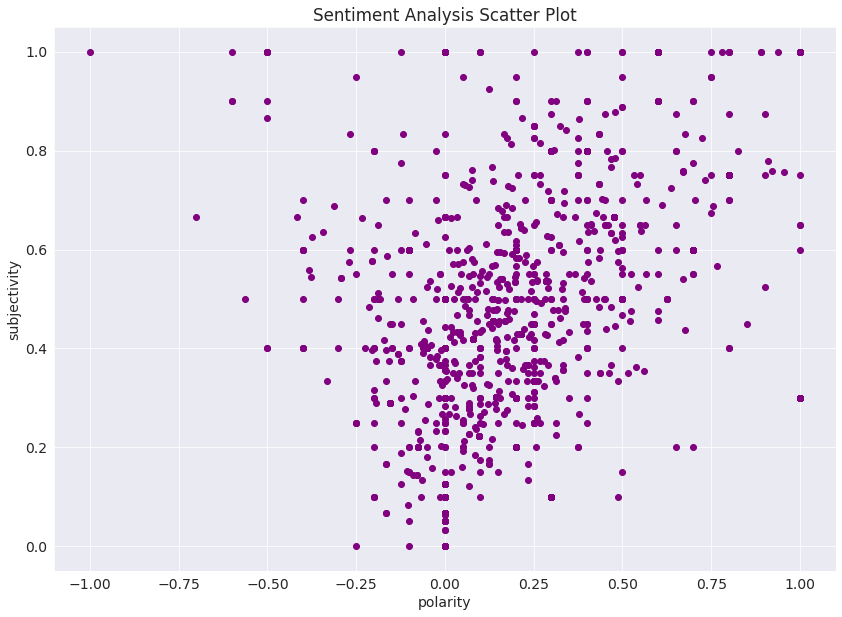

In [66]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

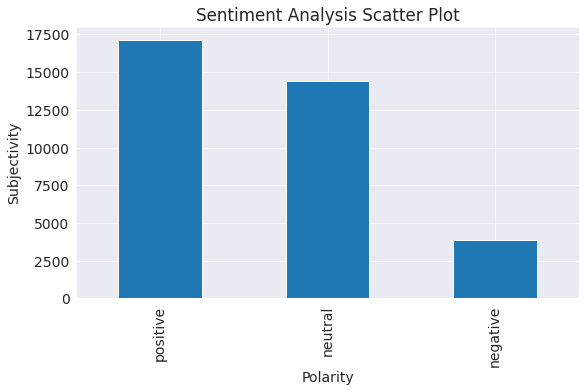

In [67]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Q: What are the countries that are actively tweeting about Bitcoin (BTC tweets country distribution)?

For that, we will need to groupby every tweet with country, then join dataframe with geopandas dataframe for country geometry.

### Dependencies

In [1]:
# import the libraries
import numpy as np

import pandas as pd

import re

import matplotlib.pyplot as plt

! pip install textblob --upgrade --quiet
from textblob import TextBlob

! pip install geopandas --upgrade --quiet
import geopandas

! pip install pycountry --upgrade --quiet
import pycountry

! pip install folium --upgrade --quiet
! pip install folium matplotlib mapclassify --upgrade --quiet

     |████████████████████████████████| 636 kB 4.8 MB/s 
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 16.7 MB 425 kB/s 
     |████████████████████████████████| 6.3 MB 49.1 MB/s 
     |████████████████████████████████| 10.1 MB 5.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 95 kB 2.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.
     |████████████████████████████████| 11.2 MB 5.2 MB/s 
     |████████████████████████████████| 930 kB 39.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

### Countries actively Tweeting.

In [71]:
df2

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Nishant Bhardwaj,"Kota, Rajasthan","Philosopher, psychologist, spiritual, writer a...",2010-07-01 06:59:21,662.0,155,915,False,2021-02-10 23:08:14,$FTM is looking super amazing. Should easily d...,"['Bitcoin', 'BTC', 'dogecoin']",Twitter for iPhone,False
1,Nishant Bhardwaj,"Kota, Rajasthan","Philosopher, psychologist, spiritual, writer a...",2010-07-01 06:59:21,662.0,155,915,False,2021-02-10 22:25:31,$TRB from 37$ to 55%. Sweet little profits in ...,"['Bitcoin', 'BTC', 'DogecoinRise']",Twitter for iPhone,False
2,AceLolzz Crypto 26K 🍥,minepi.com/AceLolzz,Crypto Enthusiast & Influencer\nMain assets: B...,2012-10-20 08:11:59,26103.0,20718,6296,False,2021-02-10 21:47:18,INSTALL #PRESEARCH BROWSER EXTENSION !!\n\n#ea...,"['PRESEARCH', 'earn', 'money', 'crypto', 'WIN']",Twitter Web App,False
3,Kur Kaç Oldu?,NaN,Günlük Döviz Kurları /\n\nDaily Currency Excha...,2016-08-14 08:28:42,2158.0,1,3,False,2021-02-10 21:00:03,"⏰ 00:00\n₿ Bitcoin = 44.709,1105 $\n#bitcoin #...","['bitcoin', 'btc', 'BTCUSD']",KurKacOldu,False
4,CryptoFractal,NaN,I’m here for Crypto Twitter! #Bitcoin ...,2020-12-11 19:19:54,46.0,258,1032,False,2021-02-10 20:15:37,History in the making #bitcoin \n#btc $BTC htt...,"['bitcoin', 'btc']",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35433,Krizzy 🛸,NaN,Freedom is the goal | PA Trader,2021-08-19 13:25:00,37.0,185,473,False,2022-05-30 00:56:38,$BTC | #BTC \n\nUpdate. https://t.co/t4DdLkwt78,['BTC'],Twitter Web App,False
35434,This Is The Top #Web3,Balaji's Crypto State,Your source for the latest and hottest Web3 la...,2022-05-12 15:06:05,8.0,201,3,False,2022-05-30 00:43:35,GM! So happy to be a part of the Donkey Link c...,"['Bitcoin', 'BTC', 'Crypto', 'Web3']","Cheap Bots, Done Quick!",False
35435,🎩Jasmine Tuff,NaN,🔥Bio...... Crypto to the moon.....let enjoy th...,2022-04-10 20:30:58,29.0,109,0,False,2022-05-30 00:30:55,uniquenftbuyer1 #GemCave has♟️Game changing on...,"['GemCave', 'BNB', 'BTC']",Twitter Web App,False
35436,sniftylabs,"Los Angeles, CA",@sniftylabs A web3 company est. 2022 | #ETH | ...,2022-02-05 03:09:44,41.0,475,1,False,2022-05-30 00:14:13,The #skulliescollection will be dropping soon!...,"['skulliescollection', 'nft', 'nftcommunity', ...",Twitter for iPhone,False


In [16]:
tweet_country = chunk.groupby('user_location')['date'].count().to_frame()
tweet_country.reset_index(inplace=True)
tweet_country.rename(columns={'user_location': 'contient'}, inplace=True)

In [17]:
tweet_country

,contient,date
0,London,4
1,Loopstarter Incubate 🌱,1
2,\tValencia,1
3,\n &#10; &#10; \n,1
4,\nI hope you know #AirCion e,2
...,...,...
82503,🫀$BTC +/ #NFT super scammer,6
82504,🫀stay alive: I care about you,2
82505,🫓,7
82506,🫠,1


In [18]:
frequency_df = tweet_country['contient'].value_counts().to_frame().reset_index()

frequency_df.rename(columns={'index': 'name', 'contient' : 'frequency'}, inplace=True)

frequency_df

,name,frequency
0,London,1
1,Some place in the world,1
2,Some Island,1
3,Some Internets,1
4,"Some Highway, Somewhere USA",1
...,...,...
82503,"Holly Springs, NC",1
82504,"Holly Ridge, NC",1
82505,Holloway,1
82506,Hollow Tree Boss,1


It appears that the user name column has mixed values. We have cities, cities + countries, states, and some other values that have no relationship with location.

We will try to split the location column into two columns. we will split after the comma this way we keep only one item to work with. Then, we will try to match the countries with countries from geopandas then match cities with geopandas cities.

The other values that have nothing to do with location and the rows that contain states will automatically be filtered out.

In [19]:
frequency_df[['name','country']] = frequency_df['name'].str.split(',', n=1, expand=True)
frequency_df

,name,frequency,country
0,London,1,None
1,Some place in the world,1,None
2,Some Island,1,None
3,Some Internets,1,None
4,Some Highway,1,Somewhere USA
...,...,...,...
82503,Holly Springs,1,NC
82504,Holly Ridge,1,NC
82505,Holloway,1,None
82506,Hollow Tree Boss,1,None


In [20]:
with pd.option_context('display.max_rows', 200):
    display(frequency_df)

,name,frequency,country
0,London,1,None
1,Some place in the world,1,None
2,Some Island,1,None
3,Some Internets,1,None
4,Some Highway,1,Somewhere USA
...,...,...,...
82503,Holly Springs,1,NC
82504,Holly Ridge,1,NC
82505,Holloway,1,None
82506,Hollow Tree Boss,1,None


In [21]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'contient', 'name', 'code', 'gdp_md_est', 'geometry']

world

,pop_est,contient,name,code,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [97]:
Twt_loc_dist = pd.merge(world, frequency_df, on='name')
Twt_loc_dist

,pop_est,contient,name,code,gdp_md_est,geometry,frequency,country
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1,None
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1,eh! Cashville
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1,Montreal
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1,Alberta
4,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1,None
...,...,...,...,...,...,...,...,...
116,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",1,None
117,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",1,None
118,39570125,Africa,Uganda,UGA,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",1,None
119,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1,None


In [98]:
nybb = geopandas.read_file(geopandas.datasets.get_path('nybb'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))


cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


In [99]:
Twt_city_dist = pd.merge(cities, frequency_df, on='name')
Twt_city_dist

,name,geometry,frequency,country
0,Luxembourg,POINT (6.13000 49.61166),1,None
1,Monaco,POINT (7.40691 43.73965),1,None
2,Andorra,POINT (1.51649 42.50000),1,None
3,Bratislava,POINT (17.11698 48.15002),1,Slovakia
4,Doha,POINT (51.53297 25.28656),1,Qatar
...,...,...,...,...
154,Paris,POINT (2.33139 48.86864),1,FR
155,Paris,POINT (2.33139 48.86864),1,None
156,Santiago,POINT (-70.66899 -33.44807),1,Metropolitana de Santiago
157,Santiago,POINT (-70.66899 -33.44807),1,Chile


In [100]:
import folium

m = Twt_loc_dist.explore(
     column="frequency",  # make choropleth based on "BoroName" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, # show legend
     k=10, # use 10 bins
     legend_kwds=dict(colorbar=False), # do not use colorbar
     name="frequency" # name of the layer in the map
)


cities.explore(
     m=m, # pass the map object
     color="red", # use red color on all points
     marker_kwds=dict(radius=2, fill=True), # make marker radius 10px with fill
     tooltip="name", # show "name" column in the tooltip
     tooltip_kwds=dict(labels=False), # do not show column label in the tooltip
     name="cities" # name of the layer in the map
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m # show map

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 1
  Warn("Warning: setting k to %d" % uvk, UserWarning)
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


In [101]:
import folium


n = Twt_city_dist.explore(
     column="frequency",  # make choropleth based on "BoroName" column
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, # show legend
     k=10, # use 10 bins
     legend_kwds=dict(colorbar=False), # do not use colorbar
     name="frequency" # name of the layer in the map
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

n # show map

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 1
  Warn("Warning: setting k to %d" % uvk, UserWarning)
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


From looking at the countries map, it appears that countries from the American continent and specifically countries from north America are the most active countries that tweet about bitcoin.

P.S: The results are not showcasing real life results just because our scope have so many invalid location values.

In [23]:
import jovian

In [24]:
jovian.commit(project="crypto-eda")


[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
